# KMeans Clustering on Iris Dataset

## Author-Riddhi Satardekar

## Importing Libraries:

In [1]:
# Pandas - Data Manipulation Tool
import pandas as pd

# Numpy - To Perform Mathematical Operations
import numpy as np

# Matplotlib - Data Visualisation Tool
import matplotlib.pyplot as plt

# Seaborn - Data Visualisation Tool
import seaborn as sns

# Machine Learning Tools
from sklearn import datasets
from sklearn.cluster import KMeans


## Importing Dataset:

In [2]:
iris = datasets.load_iris()

In [3]:
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
print("The dataframe is been created successfully!")

The dataframe is been created successfully!


## Data Analysis:

In [4]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df_iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [6]:
df_iris.shape

(150, 4)

In [7]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
df_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [9]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


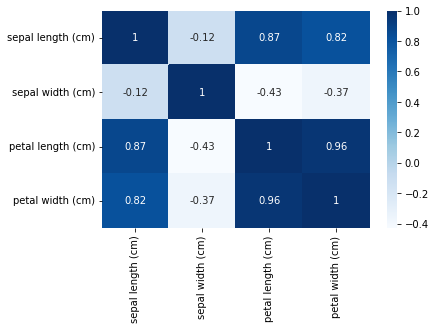

In [10]:
corr = df_iris.corr()
sns.heatmap(corr, annot = True, cmap = "Blues")

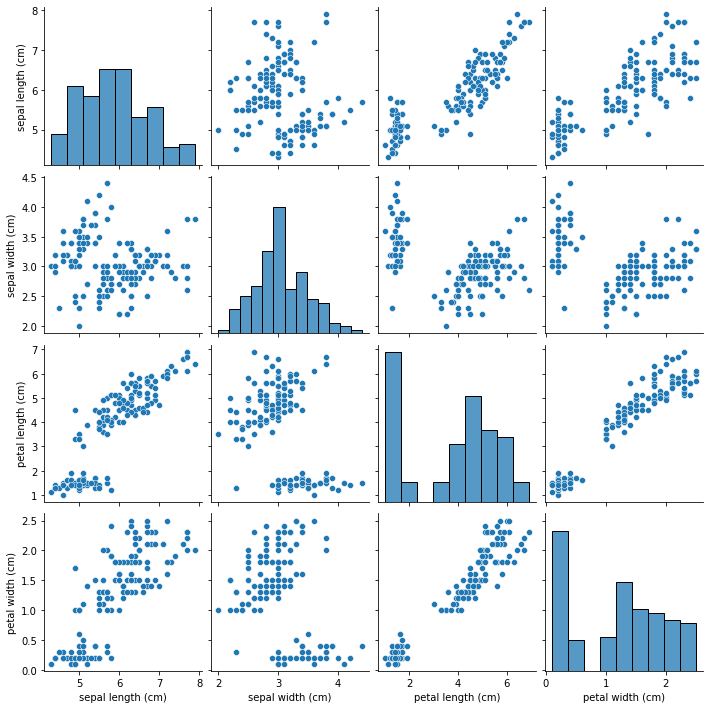

In [11]:
sns.pairplot(df_iris)

## Model Building:

In [12]:
X = df_iris.iloc[:,[0,1,2,3]].values

In [13]:
wcss = [] # Within Cluster Sums of Squares

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


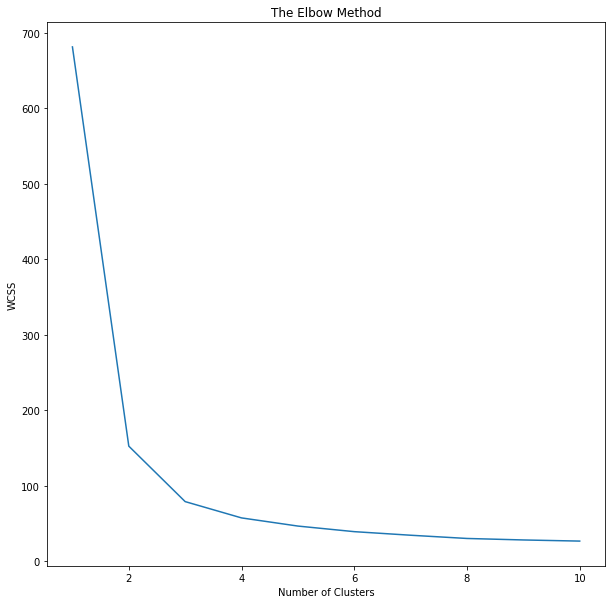

In [14]:
plt.figure(figsize=(10,10))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
# Applying Kmeans to the Dataset
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)

In [16]:
y_kmc = kmeans.fit_predict(X)

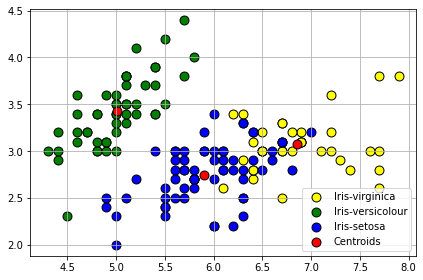

In [17]:
# Plotting KMeans Cluster
plt.scatter(X[y_kmc == 0, 0], X[y_kmc == 0, 1], s=80,
            c='yellow', edgecolor='black', label='Iris-virginica')
plt.scatter(X[y_kmc == 1, 0], X[y_kmc == 1, 1],
             s=80, c='green', edgecolor='black', label='Iris-versicolour')
plt.scatter(X[y_kmc == 2, 0], X[y_kmc == 2, 1], s=80,
            c='blue', edgecolor='black', label='Iris-setosa')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=80,c='red', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()